In [207]:
#Importing Python Libraries
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [208]:
#Load the dataset
df_car = pd.read_csv('VEHICLE.csv')

In [209]:
# inspecting the first 5 rows of the dataframe
df_car.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [210]:
# checking the number of rows and columns
df_car.shape

(398, 9)

In [211]:
# getting some information about the dataset
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [212]:
# checking the number of missing values
df_car.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [213]:
 df_car = df_car[df_car["horsepower"] !="?"]

In [215]:
df_car["horsepower"].unique

<bound method Series.unique of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: object>

In [221]:
df_car['horsepower'] = df_car['horsepower'].astype(int)

Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


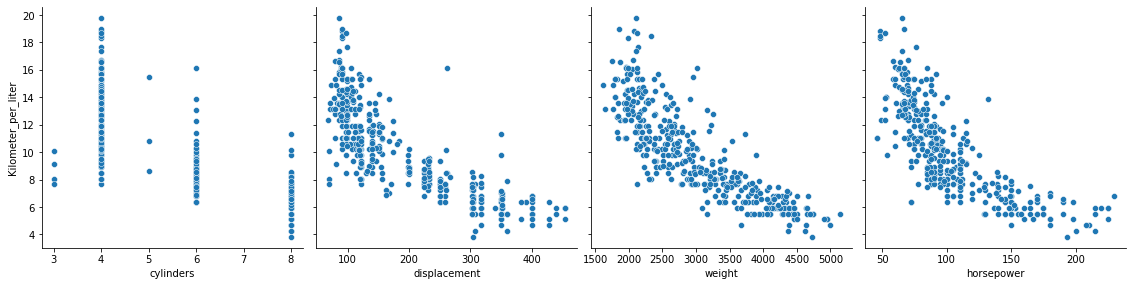

In [222]:
se.pairplot(df_car, x_vars=['cylinders', 'displacement', 'weight','horsepower'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
py.show()

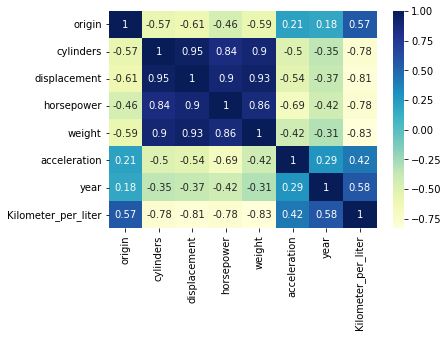

In [223]:
#Visualizing with Heatmap
se.heatmap(df_car.corr(), cmap="YlGnBu", annot = True)
py.show()

In [225]:
#Splitting the data and Target
X = df_car['displacement']
Y = df_car['Kilometer_per_liter']

In [226]:
print(X.head())

0    307.0
1    350.0
2    318.0
3    304.0
4    302.0
Name: displacement, dtype: float64


In [227]:
print(Y.head())

0    7.652587
1    6.377156
2    7.652587
3    6.802299
4    7.227443
Name: Kilometer_per_liter, dtype: float64


Splitting Training and Test data

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 35000)

In [232]:
X_train.head()

259    200.0
179    121.0
43     400.0
288    318.0
249    260.0
Name: displacement, dtype: float64

In [233]:
Y_train.head()

259    8.842989
179    9.353162
43     5.526868
288    7.737615
249    8.460360
Name: Kilometer_per_liter, dtype: float64

In [234]:
import statsmodels.api as sm

In [235]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [236]:
lr.params

const           14.703148
displacement    -0.024652
dtype: float64

In [238]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.646
Model:                             OLS   Adj. R-squared:                  0.645
Method:                  Least Squares   F-statistic:                     496.8
Date:                 Fri, 26 Aug 2022   Prob (F-statistic):           2.56e-63
Time:                         08:08:08   Log-Likelihood:                -570.56
No. Observations:                  274   AIC:                             1145.
Df Residuals:                      272   BIC:                             1152.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.7031      0.245    

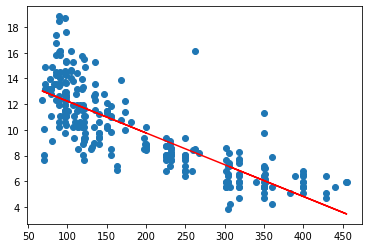

In [241]:
py.scatter(X_train, Y_train)
py.plot(X_train, 14.7031-0.0247 *X_train, 'r')
py.show()

In [242]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


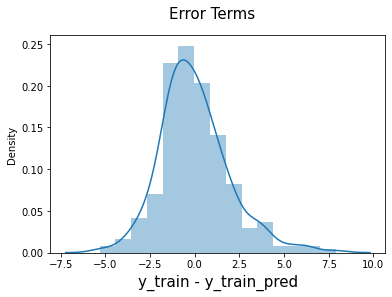

In [243]:
fig = py.figure()
se.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
py.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
py.show()

In [244]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [245]:
y_pred.head()

97      9.156368
92      6.050171
393    11.251818
226     9.008453
314    11.251818
dtype: float64

In [246]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [247]:
np.sqrt(mean_squared_error(Y_test, y_pred))

2.0301242731344757

In [248]:
r_squared = r2_score(Y_test, y_pred)
r_squared

0.6486936340198538

Univariate Regression

In [255]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [258]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [259]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [260]:
print(lm.intercept_)
print(lm.coef_)

15.036673642594184
[-0.02574905]


Bivariate Regression

In [321]:
#Splitting the data and Target
X_bi = df_car.drop(['name','origin','Kilometer_per_liter','year'],axis=1)
Y_bi = df_car['Kilometer_per_liter']

In [322]:
print(X_bi)

     cylinders  displacement  horsepower  weight  acceleration
0            8         307.0         130    3504          12.0
1            8         350.0         165    3693          11.5
2            8         318.0         150    3436          11.0
3            8         304.0         150    3433          12.0
4            8         302.0         140    3449          10.5
..         ...           ...         ...     ...           ...
393          4         140.0          86    2790          15.6
394          4          97.0          52    2130          24.6
395          4         135.0          84    2295          11.6
396          4         120.0          79    2625          18.6
397          4         119.0          82    2720          19.4

[392 rows x 5 columns]


In [323]:
print(Y_bi)

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64


In [325]:
X_train_bi, X_test_bi, Y_train_bi, Y_test_bi = train_test_split(X_bi, Y_bi, test_size = 0.1, random_state=2)

In [326]:
X_train_bi.head()

,cylinders,displacement,horsepower,weight,acceleration
217,4,111.0,80,2155,14.8
152,6,225.0,95,3264,16.0
120,4,121.0,112,2868,15.5
85,8,350.0,175,4100,13.0
340,4,156.0,92,2620,14.4


In [328]:
Y_train_bi.head()

217    12.754311
152     8.077730
120     8.077730
85      5.526868
340    10.968708
Name: Kilometer_per_liter, dtype: float64

In [329]:
import statsmodels.api as sm

In [330]:
# Add a constant to get an intercept
X_train_sm_bi = sm.add_constant(X_train_bi)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train_bi, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [331]:
lr.params

const           19.036944
cylinders       -0.206071
displacement     0.002996
horsepower      -0.022683
weight          -0.002266
acceleration     0.043812
dtype: float64

In [332]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.715
Model:                             OLS   Adj. R-squared:                  0.710
Method:                  Least Squares   F-statistic:                     134.8
Date:                 Fri, 26 Aug 2022   Prob (F-statistic):           5.19e-71
Time:                         08:54:57   Log-Likelihood:                -552.54
No. Observations:                  274   AIC:                             1117.
Df Residuals:                      268   BIC:                             1139.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.0369      1.356    

In [333]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [334]:
lin_reg_model.fit(X_train_bi,Y_train_bi)

LinearRegression()

In [336]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train_bi)

In [337]:
# R squared Error
error_score = metrics.r2_score(Y_train_bi training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7125288682138304


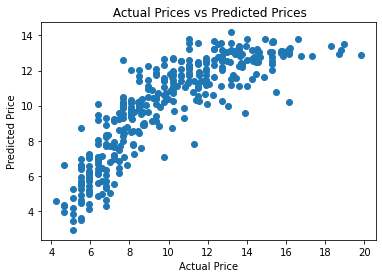

In [340]:
py.scatter(Y_train_bi, training_data_prediction)
py.xlabel("Actual Price")
py.ylabel("Predicted Price")
py.title(" Actual Prices vs Predicted Prices")
py.show()

In [342]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test_bi)

In [343]:
# R squared Error
error_score = metrics.r2_score(Y_test_bi, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6700753100845256


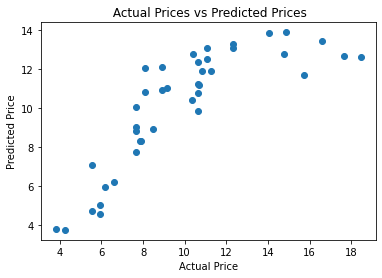

In [345]:
py.scatter(Y_test_bi, test_data_prediction)
py.xlabel("Actual Price")
py.ylabel("Predicted Price")
py.title(" Actual Prices vs Predicted Prices")
py.show()